# Outliers

## Table of Contents
* What are outliers?
* What is the impact of outliers?
* Why Do We Care About Anomalies?
* What are the different types of outliers?
* How does outliers get into data?
* What are the common reasons that lead to the presence of outliers in the data?
* What are the different techniques to detect outliers?

## What are outliers?

* Outliers are the extreme data points that are far from other data points in the dataset.
* In statistics, outliers are data points that don’t belong to a certain population. 
* It is an abnormal observation that lies far away from other values. 
* An outlier is an observation that diverges from well-structured data.

## What is the impact of outliers?

* Outliers affect the statistical analysis and may result in wrong conclusions.

## Why Do We Care About Anomalies?

* The reason why we need to detect anomalies is that when preparing datasets for machine learning models.
* It is really important to detect all the outliers and either get rid of them or analyze them to know why you had them there in the first place.

## What are the different types of outliers?

Basically there are two types of outlier are there:
* Univariate
* Multivariate

## How does outliers get into data?

* Outliers can come in different flavours, depending on the environment: point outliers, contextual outliers, or collective outliers

## What are the common reasons that lead to the presence of outliers in the data?

* Data entry errors (human errors)
* Measurement errors (instrument errors)
* Experimental errors (data extraction or experiment planning/executing errors)
* Intentional (dummy outliers made to test detection methods)
* Data processing errors (data manipulation or data set unintended mutations)
* Sampling errors (extracting or mixing data from wrong or various sources)
* Natural (not an error, novelties in data)

## What are the different techniques to detect outliers?

* Standard Deviation
* Data Visualization - Box Plots
* DBScan Clustering
* Isolation Forest
* Z Scores
* Hypothesis Tests

### Standard Deviation

* In statistics, If a data distribution is approximately normal then 
    * About 68% of the data values lie within one standard deviation of the mean.
    * About 95% are within two standard deviations of the mean.
    * About 99.7% lie within three standard deviations of the mean.

<img src='images/std.png'>

#### Therefore, if you have any data point that is more than 3 times the standard deviation, then those points are very likely to be anomalous or outliers.

#### Example:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

def find_anomalies(random_data):
    anomalies = []
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(random_data)
    data_mean = np.mean(random_data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print('lower_limit :: ',lower_limit,'upper_limit :: ',upper_limit)
    # Generate outliers
    for data_point in random_data:
        if data_point > upper_limit or data_point < lower_limit:
            anomalies.append(data_point)
    return anomalies

In [16]:
outliers = find_anomalies(data)
outliers[:3]

lower_limit ::  -40.1163963531252 upper_limit ::  80.17255260668134


[87.43134842186382, -41.64511514545226, 99.81373229732499]

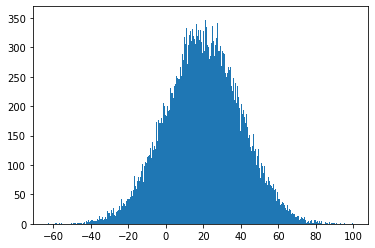

In [23]:
plt.hist(data,bins=500)
plt.show()

## Using Z-scores to Detect Outliers

* Z-scores can quantify the unusualness of an observation **when your data follow the normal distribution.** 
> #### Z-scores are the number of standard deviations above and below the mean that each value falls. 
* For example, a Z-score of 2 indicates that an observation is two standard deviations above the average while a Z-score of -2 signifies it is two standard deviations below the mean. 

> #### A Z-score of zero represents a value that equals the mean.

* To calculate the Z-score for an observation, take the raw measurement, subtract the mean, and divide by the standard deviation. 
* Mathematically, the formula for that process is the following:

$$
Z=({X-{\mu}})/{\sigma}
$$

* The further away an observation’s Z-score is from zero, the more unusual it is. 
* A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero. 
* The probability distribution below displays the distribution of Z-scores in a standard normal distribution. Z-scores beyond +/- 3 are so extreme you can barely see the shading under the curve.

<img src='images/Z-scores.png'>


> ### If your data don’t follow the normal distribution, identifying the Outilers with Z-Socres might not be accurate.

---------
## Data Visualization - Box Plots

<img src='images/box_plots.png'>

* Box plots are a graphical depiction of numerical data through their quantiles. 
* It is a very simple but effective way to visualize outliers. 
* Think about the lower and upper whiskers as the boundaries of the data distribution. 
* Any data points that show above or below the whiskers, can be considered outliers or anomalous

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

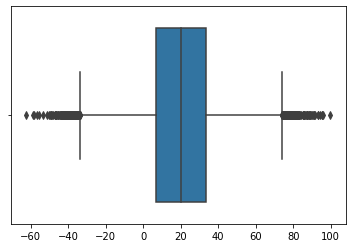

In [26]:
sns.boxplot(data)

## Boxplot Anatomy:
* The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. 
> #### IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
* In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset.
* A quartile is what divides the data into three points and four intervals.
<img src='images/iqr.png'>

## IQR Anatomy:
* Interquartile Range (IQR) is important because it is used to define the outliers. 
* It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). 
* Outliers in this case are defined as the observations that are
> #### below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.
<img src='images/iqr1.png'>

## Calculating the Outlier Fences Using the Interquartile Range
* You can use the interquartile range (IQR), several quartile values, and an adjustment factor to calculate boundaries for what constitutes minor and major outliers. 
* Minor and major denote the unusualness of the outlier relative to the overall distribution of values. 
* Major outliers are more extreme. Analysts also refer to these categorizations as mild and extreme outliers.
* The IQR is the middle 50% of the dataset.
* It’s the range of values between the third quartile and the first quartile (Q3 – Q1). 
* We can take the IQR, Q1, and Q3 values to calculate the following outlier fences for our dataset: 
    * lower outer -> Q1 - 3IQR
    * lower inner -> Q1 - 1.5IQR
    * upper inner -> Q3+1.5IQR
    * upper outer -> Q3+3IQR
* These fences determine whether data points are outliers and whether they are mild or extreme.
* The values that fall inside the two inner fences are not outliers.

## DBScan Clustering:
* DBScan is a clustering algorithm that’s used cluster data into groups. 
> #### It is also used as a **density-based anomaly detection method with either single or multi-dimensional data.** 
* Other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers. 
* In this instance, I will show you an example of using DBScan but before we start, let’s cover some important concepts. 
### DBScan has three important concepts:
* **Core Points**: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. 
> * First hyperparameter is **min_samples**. 
>    * This is simply the minimum number of core points needed in order to form a cluster. 
> * Second important Hyper Parameter is **eps**. 
>    * eps is the maximum distance between two samples for them to be considered as in the same cluster.

* **Border Points** are in the same cluster as core points but much further away from the centre of the cluster.
<img src='images/db_scan.png'>
* Everything else is called **Noise Points**, those are data points that do not belong to any cluster. 
* They can be anomalous or non-anomalous and they need further investigation

## Example

In [28]:
from sklearn.cluster import DBSCAN
random_data = np.random.randn(50000,2)  * 20 + 20

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

96

* The output of the above code is 94. This is the total number of noisy points. 
* sklearn labels the noisy points as (-1). 
> #### The downside with this method is that the higher the dimension, the less accurate it becomes. 
* You also need to make a few assumptions like estimating the right value for eps which can be challenging.

## Isolation Forest

* Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. 
> #### This approach is different from all previous methods. All the previous ones were trying to find the normal region of the data then identifies anything outside of this defined region to be an outlier or anomalous.
> #### This method works differently. It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. 
* It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. 
> #### This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies.
You can find the full details on how this algorithms works are covered in this paper.
https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

### Example:

In [29]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest(behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


array([-1,  1, -1, ...,  1,  1,  1])

* This code will output the predictions for each data point in an array. 
* If the result is -1, it means that this specific data point is an outlier. 
* If the result is 1, then it means that the data point is not an outlier.

## Robust Random Cut Forest - AWS Algorithm
* http://proceedings.mlr.press/v48/guha16.pdf

## Guidelines for Removing and Handling Outliers in Data
* If the outlier in question is:
    * A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
    * Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
    * A natural part of the population you are studying, you should not remove it.


### References:
* https://statisticsbyjim.com/basics/outliers/
* https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561
* https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
* https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html